In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mtp
from sklearn.decomposition import PCA

  
import warnings
warnings.filterwarnings("ignore")  


In [4]:
data = pd.read_csv(r"C:\Users\vinay\OneDrive\Desktop\Christ\SEM2\MACHINE LEARNING\cleaned.csv")

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13518 entries, 0 to 13517
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    13518 non-null  int64  
 1   Rooms         13518 non-null  int64  
 2   Price         13518 non-null  float64
 3   Distance      13518 non-null  float64
 4   Bedroom2      13518 non-null  int64  
 5   Bathroom      13518 non-null  int64  
 6   Car           13518 non-null  int64  
 7   Landsize      13518 non-null  float64
 8   BuildingArea  13518 non-null  float64
 9   YearBuilt     13518 non-null  int64  
 10  Lattitude     13518 non-null  float64
 11  Longtitude    13518 non-null  float64
dtypes: float64(6), int64(6)
memory usage: 1.2 MB


In [6]:
#Correlation matrix of the dataset
correlation = data.corr()
correlation.style.background_gradient(cmap='coolwarm')

,Unnamed: 0,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude
Unnamed: 0,1.000000,0.106084,-0.057098,0.299694,0.123100,0.040490,0.093213,0.027098,0.018491,0.124840,0.043109,0.058718
Rooms,0.106084,1.000000,0.497656,0.293479,0.944021,0.592917,0.408483,0.025609,0.100886,-0.012339,0.016123,0.100427
Price,-0.057098,0.497656,1.000000,-0.161081,0.476846,0.467720,0.238979,0.037482,0.077363,-0.230424,-0.212444,0.204093
Distance,0.299694,0.293479,-0.161081,1.000000,0.295296,0.126343,0.262994,0.025209,0.087313,0.219270,-0.132830,0.239363
Bedroom2,0.123100,0.944021,0.476846,0.295296,1.000000,0.584657,0.405325,0.025574,0.098345,-0.004144,0.016101,0.101918
Bathroom,0.040490,0.592917,0.467720,0.126343,0.584657,1.000000,0.322246,0.037160,0.090989,0.114836,-0.070666,0.118594
Car,0.093213,0.408483,0.238979,0.262994,0.405325,0.322246,1.000000,0.026770,0.074363,0.104499,-0.001963,0.063395
Landsize,0.027098,0.025609,0.037482,0.025209,0.025574,0.037160,0.026770,1.000000,0.092090,0.017761,0.009550,0.010837
BuildingArea,0.018491,0.100886,0.077363,0.087313,0.098345,0.090989,0.074363,0.092090,1.000000,0.011350,0.025799,-0.006234
YearBuilt,0.124840,-0.012339,-0.230424,0.219270,-0.004144,0.114836,0.104499,0.017761,0.011350,1.000000,0.042811,0.005652


In [21]:
ls =['YearBuilt','Unnamed: 0']
data = data.drop(ls ,axis = 1)

### Applying PCA to reduce the dimensions

In [7]:
pca = PCA(2)
#Transform the data
df = pca.fit_transform(data)
df.shape

(13518, 2)

### Elbow method to find optimal clusters

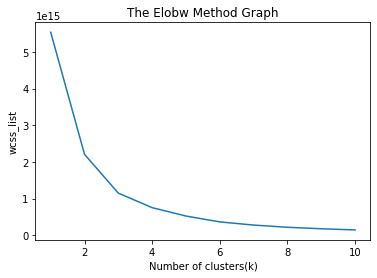

In [8]:
#finding optimal number of clusters using the elbow method  
from sklearn.cluster import KMeans  
wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(df)  
    wcss_list.append(kmeans.inertia_)  
mtp.plot(range(1, 11), wcss_list)  
mtp.title('The Elobw Method Graph')  
mtp.xlabel('Number of clusters(k)')  
mtp.ylabel('wcss_list')  
mtp.show()  

### After implementing the elbow method we will take clusters as 2

In [9]:
k_means_optimum = KMeans(n_clusters = 2, init = 'k-means++',  random_state=42)
y = k_means_optimum.fit_predict(df)
print(y)

[1 0 1 ... 0 1 0]


In [10]:
data1 = df[y==0]
data2 = df[y==1]

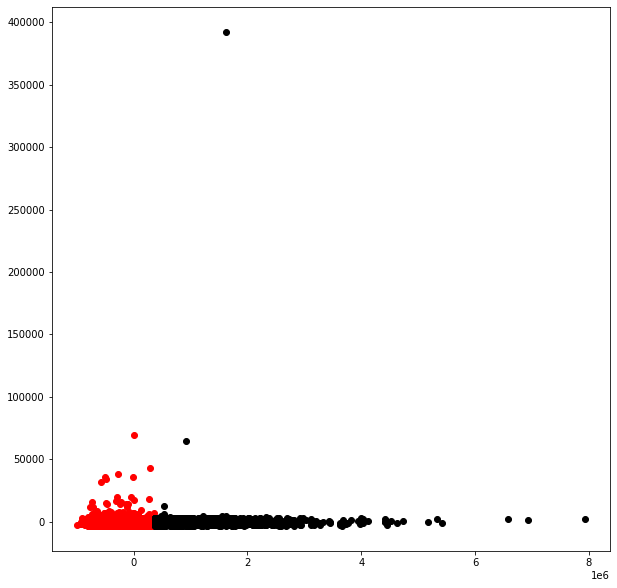

In [11]:
mtp.figure(figsize=(10,10))
mtp.scatter(data1[:,0], data1[:,1] , color = 'red')
mtp.scatter(data2[:,0], data2[:,1], color = 'black')
mtp.show()

### Getting the silhooueete score for the clusters

In [12]:
from sklearn.metrics import silhouette_score
score = silhouette_score(df,y)
print(score)

0.6468889329408165


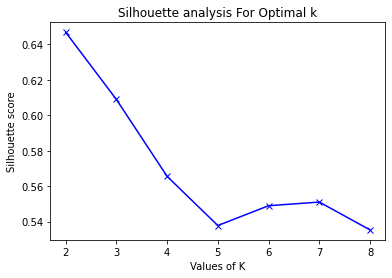

In [13]:
from sklearn.metrics import silhouette_samples, silhouette_score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
for num_clusters in range_n_clusters:
 
 # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(df)
    cluster_labels = kmeans.labels_
 
 # silhouette score
    silhouette_avg.append(silhouette_score(df, cluster_labels))
    
mtp.plot(range_n_clusters,silhouette_avg,'bx-')
mtp.xlabel('Values of K') 
mtp.ylabel('Silhouette score') 
mtp.title('Silhouette analysis For Optimal k')
mtp.show()

### We can see for 2 clusters the siloutee value is high <br>
#### Advantages <br>
1. Simple to implement
2. More flexible than the other clustering algorithms
<br>
#### Disadvantages <br>
1. Clustering outliers - Centroids can be dragged by outliers, or outliers might get their own cluster instead of being ignored.
2. Scaling with number of dimensions. 
